In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from mpl_toolkits.mplot3d import Axes3D
import os
import freud
from tqdm.auto import tqdm
from numba import njit,prange
import scipy,ipympl
%matplotlib ipympl
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
#for root,dirs,files in os.walk("../data/hero4809/"):
for root, dirs, files in os.walk("../data/anneal2/anneal219_kbt0.05"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
#assert len(simlist) == len(datafiles) == len(csvfiles)
print(len(datafiles))
def load_csv(fname,verbose=True):
    if verbose:
        with open(fname) as f:
            print(f.readline().strip('\n'))
    return np.loadtxt(fname,skiprows=1,delimiter=",")

1


In [2]:
datafile = datafiles[0] #120,371,242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape

../data/anneal2/anneal219_kbt0.05/anneal219_kbt0.05_data.npz


[]

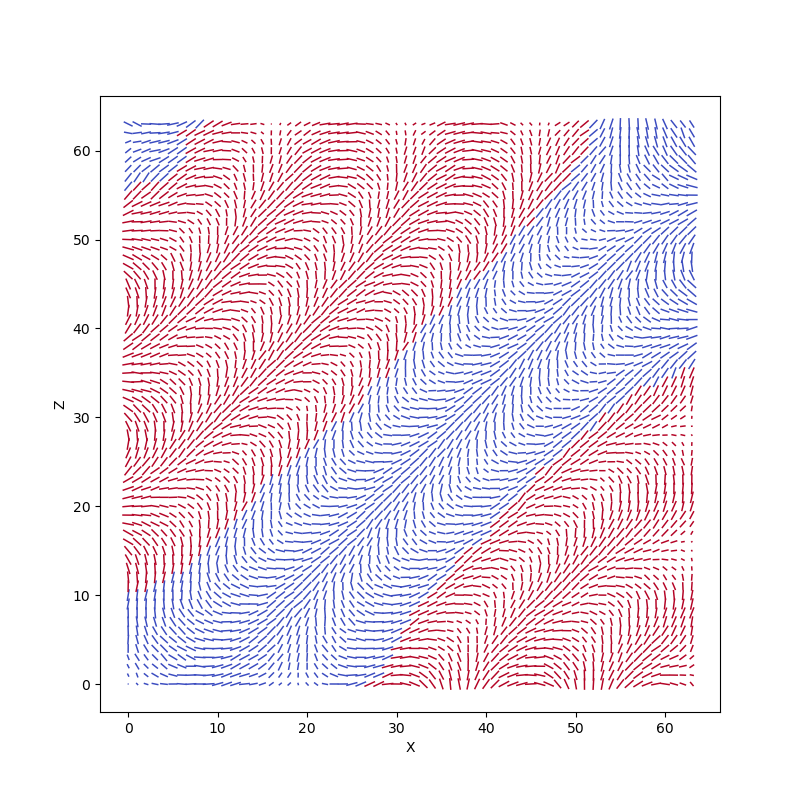

In [3]:
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
u = data['nx'][:,mp,:]
v = data['ny'][:,mp,:]
w = data['nz'][:,mp,:]
s = data['s'][:,mp,:]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.quiver(X,Z,u,w,s,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.plot()

  0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_31978/1910706323.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  textstr = "Peak: "+str(np.round(kvs[np.argmax(sf)],5))+"\n"+"2*Pi/Peak: "+str(np.round((2.0*np.pi)/kvs[np.argmax(sf)],5))+"\n"+"1/Peak: "+str(np.round(1/kvs[np.argmax(sf)],5))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

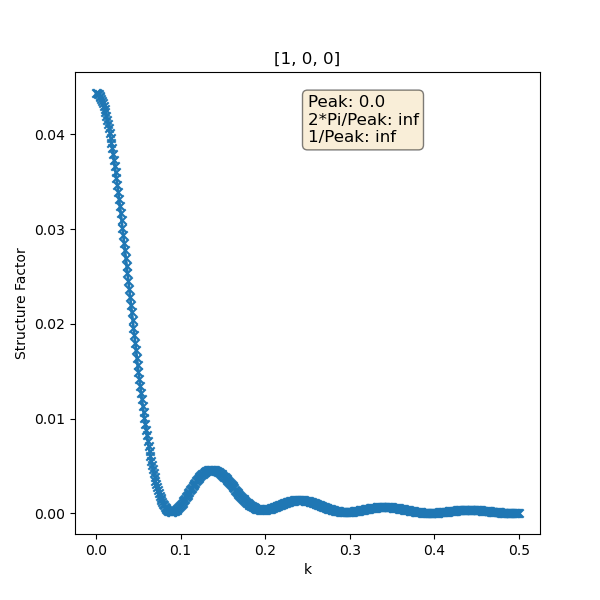

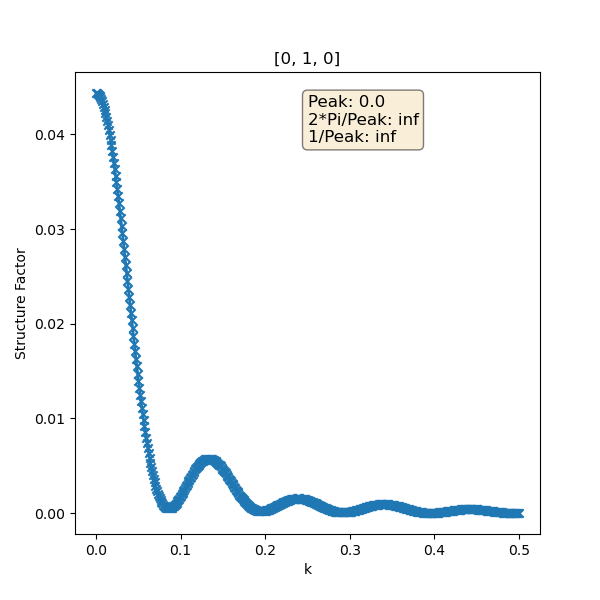

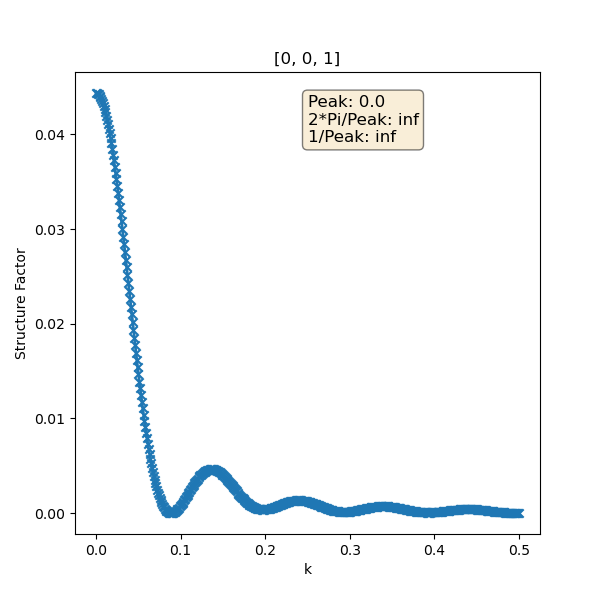

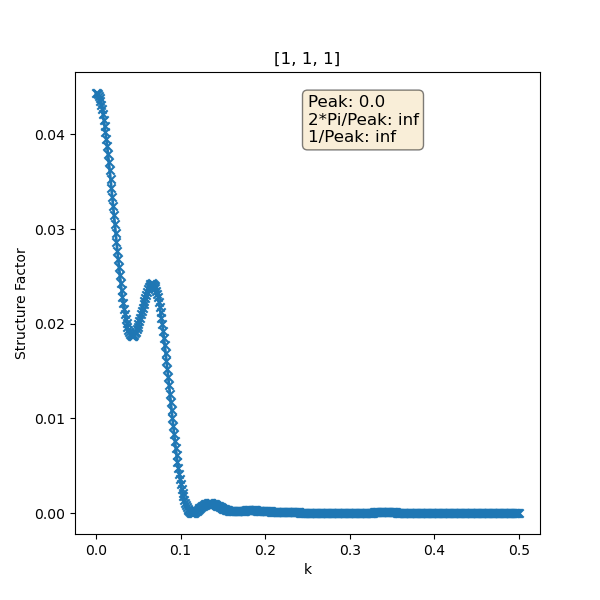

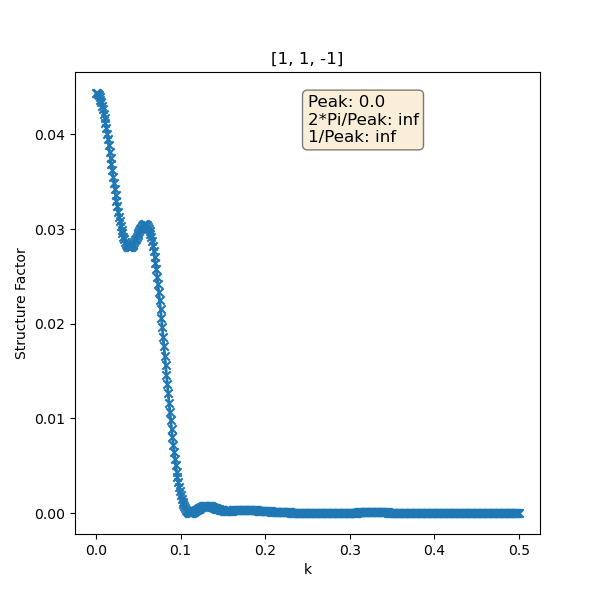

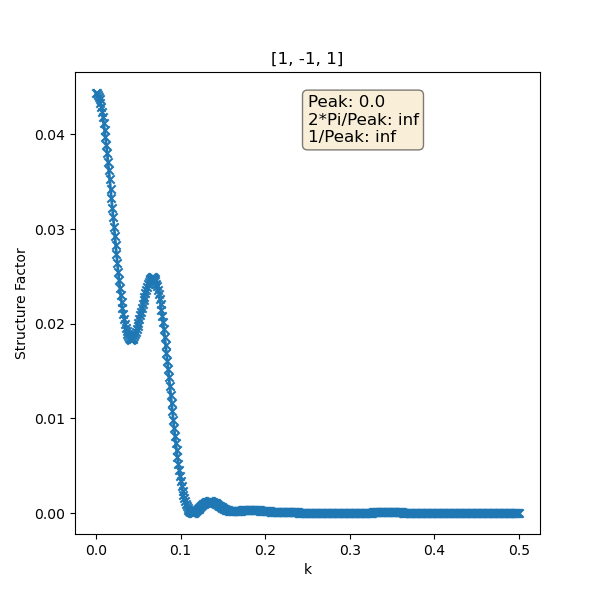

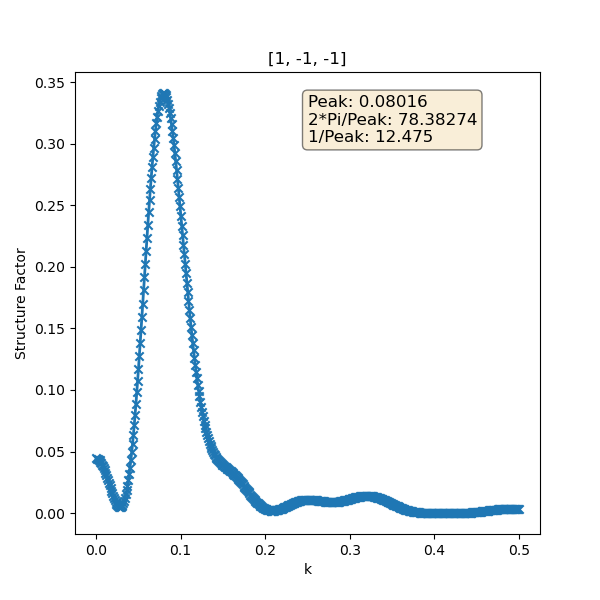

In [4]:
@njit(parallel=True)
def get_sc(s,kvec):
    sc = 0.0
    for i in prange(s.shape[0]):
        for j in range(s.shape[1]):
            for k in range(s.shape[2]):
                sc += s[i,j,k]*np.exp(-1j * np.dot(kvec,np.array([float(i+1),float(j+1),float(k+1)])))
    return sc

def structure_factor(data,bins,k_min,k_max,plane):
    N3 = (data.shape[0]*data.shape[1]*data.shape[2])
    # kv_pre = (2*np.pi)/(np.sqrt(3)*data.shape[0])
    # kvs = kv_pre*np.arange(bins)
    kvs = np.linspace(k_min,k_max,bins)#(0.0,0.5,500)
    sc = np.zeros(len(kvs),dtype=complex)
    for idx,kv in enumerate(tqdm(kvs)):
        kvec = kv*np.array(plane)
        sc[idx] = get_sc(data,kvec)/N3
    sf = sc.real*sc.real + sc.imag*sc.imag
    return sf,kvs

planes = [[1,0,0],[0,1,0],[0,0,1], # faces
          [1,1,1],[1,1,-1,],[1,-1,1],[1,-1,-1,]] #diagonals
for p in planes:
    sf,kvs = structure_factor(data['s'],500,0.0,0.5,p)
    textstr = "Peak: "+str(np.round(kvs[np.argmax(sf)],5))+"\n"+"2*Pi/Peak: "+str(np.round((2.0*np.pi)/kvs[np.argmax(sf)],5))+"\n"+"1/Peak: "+str(np.round(1/kvs[np.argmax(sf)],5))
    # print("Peak:\t",kvs[np.argmax(sf)])
    # print("2*Pi/Peak:\t",(2.0*np.pi)/kvs[np.argmax(sf)])
    # print("1/Peak:\t",1/kvs[np.argmax(sf)])
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_title(str(p))
    ax.set_xlabel("k")
    ax.set_ylabel("Structure Factor")
    ax.scatter(kvs,sf,marker='x')
    ax.plot(kvs,sf,linewidth=2)
    ax.text(0.5, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.show


In [ ]:
"""
sims = ["../data/hero4801/hero4801_data.npz",
       "../data/hero4802/hero4802_data.npz",
       "../data/hero4803/hero4803_data.npz",
       "../data/hero4804/hero4804_data.npz",
       "../data/hero4805/hero4805_data.npz",
       "../data/hero4806/hero4806_data.npz",
       "../data/hero4807/hero4807_data.npz",
       "../data/hero4808/hero4808_data.npz",
       "../data/hero4809/hero4809_data.npz"]

planes = [[1,0,0],[0,1,0],[0,0,1], # faces
          [1,1,1],[1,1,-1,],[1,-1,1],[1,-1,-1,]] #diagonals
for datafile in sims:
    print(datafile)
    data = np.load(datafile)
    for p in planes:
        sf,kvs = structure_factor(data['s'],500,0.0,0.5,p)
        textstr = "Peak: "+str(np.round(kvs[np.argmax(sf)],5))+"\n"+"2*Pi/Peak: "+str(np.round((2.0*np.pi)/kvs[np.argmax(sf)],5))+"\n"+"1/Peak: "+str(np.round(1/kvs[np.argmax(sf)],5))
        # print("Peak:\t",kvs[np.argmax(sf)])
        # print("2*Pi/Peak:\t",(2.0*np.pi)/kvs[np.argmax(sf)])
        # print("1/Peak:\t",1/kvs[np.argmax(sf)])
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111)
        ax.set_title(str(p))
        ax.set_xlabel("k")
        ax.set_ylabel("Structure Factor")
        ax.scatter(kvs,sf,marker='x')
        ax.plot(kvs,sf,linewidth=2)
        ax.text(0.5, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        fname = datafile.split("/")[-1].split(".")[0].split("_")[0]+"_"+str(p[0])+str(p[1])+str(p[2])+".png"
        fig.savefig(fname)
        """

../data/hero4801/hero4801_data.npz


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def plot_projection(data,plane,is3D=False,threshold=1.2):
    ni,nj,nk = data['nx'].shape
    print(data['nx'].shape)
    X,Y,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nj),np.arange(0,nk))
    u = data['nx']
    v = data['ny']
    w = data['nz']
    s = data['s']

    # Miller index [1, 1, 1]
    h, k, l = 1, 1, 1
    #h,k,l = plane[0],plane[1],plane[2]

    # Equation of the plane: h*x + k*y + l*z = 0
    # We're selecting points that are near the plane.
    # You can adjust the threshold to control the 'thickness' of the slice.
    #threshold = 1.2
    mask = np.abs(h*X + k*Y + l*Z) < threshold
    print(mask.sum())
    # Get the points and vectors on the plane
    x_plane, y_plane, z_plane = X[mask], Y[mask], Z[mask]
    vx_plane, vy_plane, vz_plane, s_plane = u[mask], v[mask], w[mask],s[mask]
    if is3D:
        # Plot the points on the plane in 3D (for visualization)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        c = plt.cm.hsv(s_plane)
        ax.quiver(x_plane, y_plane, z_plane, vx_plane, vy_plane, vz_plane, colors=c, length=1, normalize=True)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.title("3D Quiver Plot over ["+str(plane[0])+","+str(plane[1])+","+str(plane[2])+"]")
    else:
        # 2D projection on the plane [1,1,1] (Diagonal Plane)
        # First, let's project the vectors onto the plane.
        # Create a basis for the plane (two perpendicular vectors in the plane)
        normal = np.array([h, k, l])  # Normal to the plane
        normal = normal / np.linalg.norm(normal)  # Normalize the normal
        
        # Automatically find a vector perpendicular to the normal
        # Choose an arbitrary vector that is not parallel to the normal
        arbitrary_vec = np.array([1, 0, 0])
        if np.allclose(np.cross(normal, arbitrary_vec), 0):
            arbitrary_vec = np.array([0, 1, 0])  # Switch if they are collinear
        
        # First basis vector is the cross product of the normal and arbitrary vector
        basis1 = np.cross(normal, arbitrary_vec)
        basis1 = basis1 / np.linalg.norm(basis1)  # Normalize it
        
        # Second basis vector is perpendicular to both the normal and basis1
        basis2 = np.cross(normal, basis1)
        basis2 = basis2 / np.linalg.norm(basis2)  # Normalize it

        
        # Project the points onto the plane
        points_on_plane = np.vstack([x_plane, y_plane, z_plane]).T
        proj1 = np.dot(points_on_plane, basis1)
        proj2 = np.dot(points_on_plane, basis2)
        
        # Project the vectors onto the plane
        vectors_on_plane = np.vstack([vx_plane, vy_plane, vz_plane]).T
        v_proj1 = np.dot(vectors_on_plane, basis1)
        v_proj2 = np.dot(vectors_on_plane, basis2)
        
        # Plot the 2D projection
        fig2, ax2 = plt.subplots()
        ax2.quiver(proj1, proj2, v_proj1, v_proj2, scale=50,headwidth=0.0)
        ax2.set_xlabel('Projection along basis 1')
        ax2.set_ylabel('Projection along basis 2')
        plt.title('2D Quiver Plot Projected on the [1, 1, 1] Plane')
    plt.show()

plot_projection(data,[1,1,1],is3D=True,threshold=30.0)

In [ ]:
#https://freud.readthedocs.io/en/latest/gettingstarted/examples/module_intros/density.CorrelationFunction.html
import freud
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

def plot_data(title, points, angles, values, box, cf, s=200):
    cmap = matplotlib.cm.viridis
    norm = Normalize(vmin=-np.pi / 4, vmax=np.pi / 4)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    for point, angle, value in zip(points, angles, values):
        plt.scatter(
            point[0],
            point[1],
            marker=(4, 0, np.rad2deg(angle) + 45),
            edgecolor="k",
            c=[cmap(norm(angle))],
            s=s,
        )
    plt.title(title)
    plt.gca().set_xlim([-box.Lx / 2, box.Lx / 2])
    plt.gca().set_ylim([-box.Ly / 2, box.Ly / 2])
    plt.gca().set_aspect("equal")
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array(angles)
    plt.colorbar(sm, ax=plt.gca())
    plt.subplot(122)
    plt.title("Orientation Spatial Autocorrelation Function")
    cf.plot(ax=plt.gca())
    plt.xlabel(r"$r$")
    plt.ylabel(r"$C(r)$")
    plt.show()

def make_particles(L, repeats):
    uc = freud.data.UnitCell.square()
    return uc.generate_system(
        num_replicas=repeats, scale=L / repeats, sigma_noise=5e-3 * L
    )


# Make a small system
box, points = make_particles(L=40, repeats=40)

# All the particles begin with their orientation at 0
# angles = np.zeros(len(points))
# values = np.array(np.exp(angles * 4j))
# angles = np.random.uniform(-np.pi / 4, np.pi / 4, size=len(points))
# values = np.exp(angles * 4j)
angles = np.pi / 4 * np.cos(8 * np.pi * points[:, 0] / box.Lx)
values = np.exp(angles * 4j)

# Create the CorrelationFunction compute object and compute the correlation function
cf = freud.density.CorrelationFunction(bins=25, r_max=box.Lx / 2.01)
cf.compute(
    system=(box, points), values=values, query_points=points, query_values=values
)


plot_data(
    "Particles before introducing Orientational Disorder",
    points,
    angles,
    values,
    box,
    cf,
)
print(points.shape)
print(points)
print(values.shape)
print(values)

In [ ]:
simbox = freud.Box.square(mp)
s = data['s'][0:mp,mp,0:mp]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(s)
plt.plot()
print(s.shape)
points = np.where(s == 1)
points_flattened = np.vstack(list(map(np.ravel, points))).T
print(points_flattened[0:10])
print(points_flattened.shape)
p2 = np.zeros((len(points_flattened),3))
print(p2.shape)
p2[:,0:2] = points_flattened
print(p2[0:10])
print(s[points].shape)
cf = freud.density.CorrelationFunction(bins=25,r_max=simbox.Lx/2.01)
cf.compute(system=(simbox,p2),values=s[points])#,query_points=points,query_values=values)

In [ ]:
# Radial distribution function
simbox = freud.Box.square(mp)
s = data['s'][0:mp,mp,0:mp]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(s)
plt.plot()
print(s.shape)
points = np.where(s == 1)
points_flattened = np.vstack(list(map(np.ravel, points))).T
p3 = np.zeros((len(points_flattened),3))
p3[:,0:2] = points_flattened
rdf = freud.density.RDF(100, 16)
rdf.compute(system=(simbox, p3), reset=False)

(128, 128)
(16384,)
(16384, 2)
1532
1528


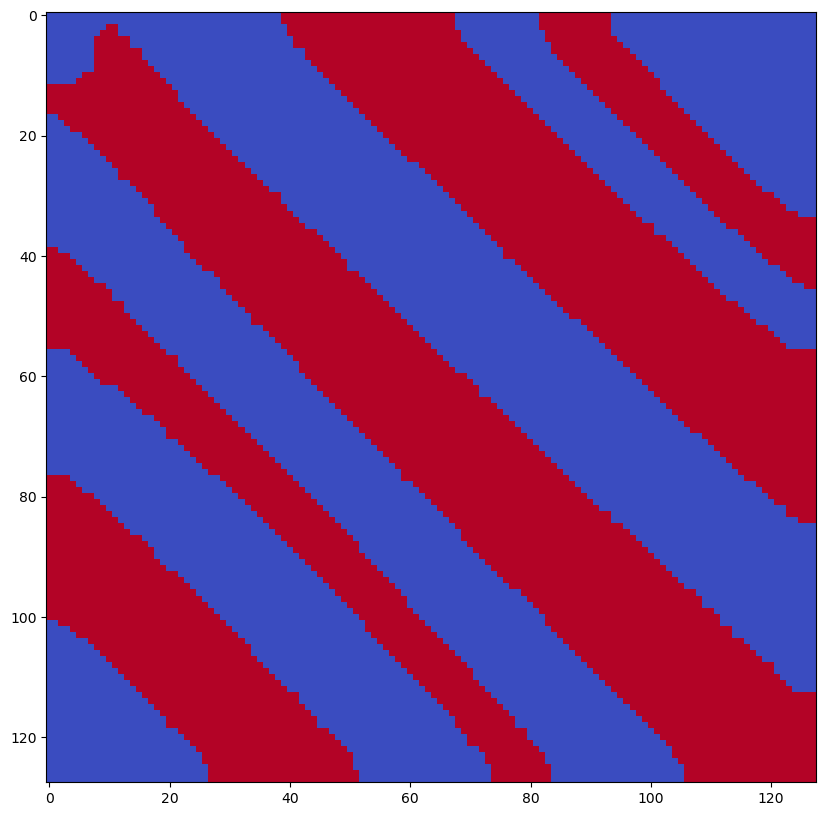

In [64]:
# interface and neighbor counting
simbox = freud.Box.square(data['s'].shape[0])
s = data['s'][:,mp,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(s,cmap="coolwarm")
plt.plot()
print(s.shape)
values = s.ravel()
print(values.shape)
points_flattened = np.vstack(list(map(np.ravel, np.mgrid[0:data['s'].shape[0],0:data['s'].shape[1]]))).T
print(points_flattened.shape)
points = np.zeros((len(points_flattened),3))
points[:,0:2] = points_flattened
iface = freud.interface.Interface()
iface.compute((simbox, points[values > 0]), points[values < 0], neighbors={"r_max": 1.5})
print(iface.query_point_count)
print(iface.point_count)
# rdf = freud.density.RDF(100, 16)
# rdf.compute(system=(simbox, p3), reset=False)

[[-1.  0.  0. ... -1. -1. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [-1.  0.  0. ...  0.  0.  1.]
 [-1.  0.  0. ...  0.  0.  1.]
 [-1.  0.  0. ...  1.  1.  1.]]


[]

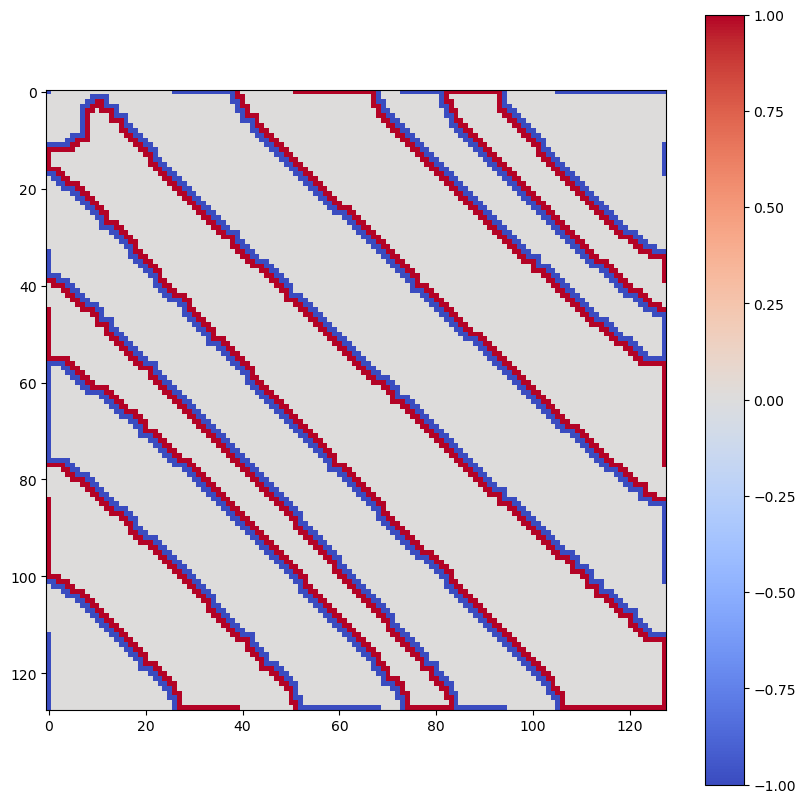

In [79]:
interface_values = np.zeros(len(points))
interface_values[np.where(values < 0)[0][iface.query_point_ids]] = -1
interface_values[np.where(values > 0)[0][iface.point_ids]] = 1
print(interface_values.reshape(data['s'].shape[0],data['s'].shape[0]))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
img = ax.imshow(interface_values.reshape(data['s'].shape[0],data['s'].shape[0]),cmap="coolwarm")
fig.colorbar(img)
plt.plot()

(1532,)
[[ 0.  0.]
 [ 0. 26.]
 [ 0. 27.]
 [ 0. 28.]
 [ 0. 29.]
 [ 0. 30.]
 [ 0. 31.]
 [ 0. 32.]
 [ 0. 33.]
 [ 0. 34.]]


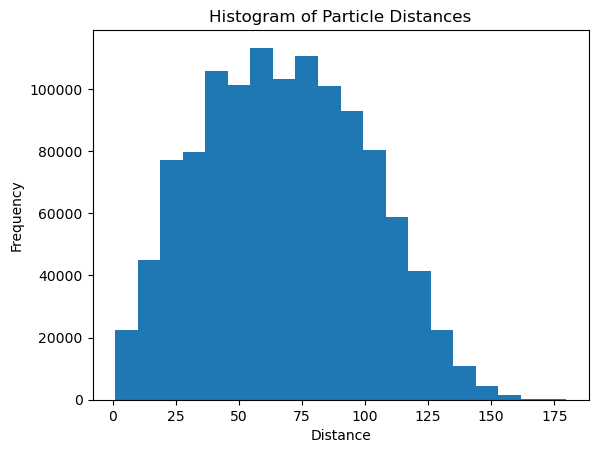

In [69]:
print(interface_values[np.where(values < 0)[0][iface.query_point_ids]].shape)
X,Y = np.mgrid[0:data['s'].shape[0],0:data['s'].shape[0]]
p3 = np.zeros((interface_values[np.where(values < 0)[0][iface.query_point_ids]].shape[0],2))
p3[:,0] = X.ravel()[np.where(values < 0)[0][iface.query_point_ids]]
p3[:,1] = Y.ravel()[np.where(values < 0)[0][iface.query_point_ids]]
print(p3[0:10])
distances = scipy.spatial.distance.pdist(p3)
plt.hist(distances, bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Particle Distances')
plt.show()